# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import pprint
import requests
import time
import os

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
city_weather_data = os.path.join("CSV", "cities_weather_data.csv")

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination using citypy
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#print(cities)

594

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [49]:
#https://realpython.com/python-f-strings/
#url = 'https://api.openweathermap.org/data/2.5/weather?APPID='
#use imperial
#search = '&units=imperial&q='
#full_url = url + api_key + search
#print(full_url)
url = f'https://api.openweathermap.org/data/2.5/weather?APPID={api_key}&units=imperial&q='
data_df = pd.DataFrame({'City':[],
                        'Cloudiness':[],
                        'Country':[],
                        'Date':[],
                        'Humidity':[],
                        'Lat':[],
                        'Lng':[],
                        'MaxTemp':[],
                        'WindSpeed':[]
                       })

In [53]:
#I wanted to know how long this takes
response_request = requests.post(url)
cities_count = (len(cities))
response_time = response_request.elapsed.total_seconds()/60

In [52]:
#create a loop to go through all the cities in the list
#start at 0 and iterate through the cities
#API says, no more than 60 calls per minute. Refresh delay is 2 seconds from the API. 
#this is untrue.. 
x = 0

print(f'Running API requests. This is going to take around {round((cities_count * response_time),0)} minutes to complete. Go get coffee')
for city in cities:    
    response_req = requests.get(url+city)
    response = response_req.json()

    if (response['cod'] == 200):
        x = x+1
        print(f'Processing Record {x} | {city}')
        print(response_req.url)

        data_df.loc[x,'City'] = city
        data_df.loc[x,'Cloudiness'] = response['clouds']['all']
        data_df.loc[x,'Country'] = response['sys']['country']
        data_df.loc[x,'Date'] = response['dt']
        data_df.loc[x,'Humidity'] = response['main']['humidity']
        data_df.loc[x,'Lat'] = response['coord']['lat']
        data_df.loc[x,'Lng'] = response['coord']['lon']
        data_df.loc[x,'MaxTemp'] = response['main']['temp_max']
        data_df.loc[x,'WindSpeed'] = response['wind']['speed']
    else:
        print('City not found. Skipping')
            

print("Data Retrieval Complete")      


Running API requests. This is going to take around 3.0 minutes to complete. Go get coffee
Processing Record 1 | navalmoral de la mata
https://api.openweathermap.org/data/2.5/weather?APPID=5fac6a5de68d969f7cbf33e9478e5380&units=imperial&q=navalmoral%20de%20la%20mata
Processing Record 2 | lima
https://api.openweathermap.org/data/2.5/weather?APPID=5fac6a5de68d969f7cbf33e9478e5380&units=imperial&q=lima
Processing Record 3 | dombarovskiy
https://api.openweathermap.org/data/2.5/weather?APPID=5fac6a5de68d969f7cbf33e9478e5380&units=imperial&q=dombarovskiy
Processing Record 4 | tasiilaq
https://api.openweathermap.org/data/2.5/weather?APPID=5fac6a5de68d969f7cbf33e9478e5380&units=imperial&q=tasiilaq
Processing Record 5 | atuona
https://api.openweathermap.org/data/2.5/weather?APPID=5fac6a5de68d969f7cbf33e9478e5380&units=imperial&q=atuona
Processing Record 6 | tuktoyaktuk
https://api.openweathermap.org/data/2.5/weather?APPID=5fac6a5de68d969f7cbf33e9478e5380&units=imperial&q=tuktoyaktuk
Processing R

City not found. Skipping
Processing Record 56 | el alto
https://api.openweathermap.org/data/2.5/weather?APPID=5fac6a5de68d969f7cbf33e9478e5380&units=imperial&q=el%20alto
Processing Record 57 | port elizabeth
https://api.openweathermap.org/data/2.5/weather?APPID=5fac6a5de68d969f7cbf33e9478e5380&units=imperial&q=port%20elizabeth
Processing Record 58 | teya
https://api.openweathermap.org/data/2.5/weather?APPID=5fac6a5de68d969f7cbf33e9478e5380&units=imperial&q=teya
Processing Record 59 | arraial do cabo
https://api.openweathermap.org/data/2.5/weather?APPID=5fac6a5de68d969f7cbf33e9478e5380&units=imperial&q=arraial%20do%20cabo
Processing Record 60 | sedro-woolley
https://api.openweathermap.org/data/2.5/weather?APPID=5fac6a5de68d969f7cbf33e9478e5380&units=imperial&q=sedro-woolley
Processing Record 61 | sabang
https://api.openweathermap.org/data/2.5/weather?APPID=5fac6a5de68d969f7cbf33e9478e5380&units=imperial&q=sabang
Processing Record 62 | san cristobal
https://api.openweathermap.org/data/2.

City not found. Skipping
Processing Record 110 | lebu
https://api.openweathermap.org/data/2.5/weather?APPID=5fac6a5de68d969f7cbf33e9478e5380&units=imperial&q=lebu
Processing Record 111 | veseloyarsk
https://api.openweathermap.org/data/2.5/weather?APPID=5fac6a5de68d969f7cbf33e9478e5380&units=imperial&q=veseloyarsk
Processing Record 112 | saint george
https://api.openweathermap.org/data/2.5/weather?APPID=5fac6a5de68d969f7cbf33e9478e5380&units=imperial&q=saint%20george
Processing Record 113 | yellowknife
https://api.openweathermap.org/data/2.5/weather?APPID=5fac6a5de68d969f7cbf33e9478e5380&units=imperial&q=yellowknife
Processing Record 114 | palmer
https://api.openweathermap.org/data/2.5/weather?APPID=5fac6a5de68d969f7cbf33e9478e5380&units=imperial&q=palmer
Processing Record 115 | avarua
https://api.openweathermap.org/data/2.5/weather?APPID=5fac6a5de68d969f7cbf33e9478e5380&units=imperial&q=avarua
Processing Record 116 | sunrise manor
https://api.openweathermap.org/data/2.5/weather?APPID=5

Processing Record 165 | itarema
https://api.openweathermap.org/data/2.5/weather?APPID=5fac6a5de68d969f7cbf33e9478e5380&units=imperial&q=itarema
Processing Record 166 | skibbereen
https://api.openweathermap.org/data/2.5/weather?APPID=5fac6a5de68d969f7cbf33e9478e5380&units=imperial&q=skibbereen
Processing Record 167 | santa maria
https://api.openweathermap.org/data/2.5/weather?APPID=5fac6a5de68d969f7cbf33e9478e5380&units=imperial&q=santa%20maria
City not found. Skipping
Processing Record 168 | fortuna
https://api.openweathermap.org/data/2.5/weather?APPID=5fac6a5de68d969f7cbf33e9478e5380&units=imperial&q=fortuna
Processing Record 169 | flin flon
https://api.openweathermap.org/data/2.5/weather?APPID=5fac6a5de68d969f7cbf33e9478e5380&units=imperial&q=flin%20flon
Processing Record 170 | cortez
https://api.openweathermap.org/data/2.5/weather?APPID=5fac6a5de68d969f7cbf33e9478e5380&units=imperial&q=cortez
Processing Record 171 | khatanga
https://api.openweathermap.org/data/2.5/weather?APPID=5fac

Processing Record 220 | paamiut
https://api.openweathermap.org/data/2.5/weather?APPID=5fac6a5de68d969f7cbf33e9478e5380&units=imperial&q=paamiut
Processing Record 221 | togur
https://api.openweathermap.org/data/2.5/weather?APPID=5fac6a5de68d969f7cbf33e9478e5380&units=imperial&q=togur
City not found. Skipping
Processing Record 222 | almeirim
https://api.openweathermap.org/data/2.5/weather?APPID=5fac6a5de68d969f7cbf33e9478e5380&units=imperial&q=almeirim
Processing Record 223 | joaima
https://api.openweathermap.org/data/2.5/weather?APPID=5fac6a5de68d969f7cbf33e9478e5380&units=imperial&q=joaima
Processing Record 224 | ahuimanu
https://api.openweathermap.org/data/2.5/weather?APPID=5fac6a5de68d969f7cbf33e9478e5380&units=imperial&q=ahuimanu
Processing Record 225 | banyuwangi
https://api.openweathermap.org/data/2.5/weather?APPID=5fac6a5de68d969f7cbf33e9478e5380&units=imperial&q=banyuwangi
City not found. Skipping
Processing Record 226 | buenos aires
https://api.openweathermap.org/data/2.5/weath

City not found. Skipping
Processing Record 275 | labuhan
https://api.openweathermap.org/data/2.5/weather?APPID=5fac6a5de68d969f7cbf33e9478e5380&units=imperial&q=labuhan
Processing Record 276 | broome
https://api.openweathermap.org/data/2.5/weather?APPID=5fac6a5de68d969f7cbf33e9478e5380&units=imperial&q=broome
Processing Record 277 | changji
https://api.openweathermap.org/data/2.5/weather?APPID=5fac6a5de68d969f7cbf33e9478e5380&units=imperial&q=changji
Processing Record 278 | katobu
https://api.openweathermap.org/data/2.5/weather?APPID=5fac6a5de68d969f7cbf33e9478e5380&units=imperial&q=katobu
Processing Record 279 | cockburn town
https://api.openweathermap.org/data/2.5/weather?APPID=5fac6a5de68d969f7cbf33e9478e5380&units=imperial&q=cockburn%20town
Processing Record 280 | samarkand
https://api.openweathermap.org/data/2.5/weather?APPID=5fac6a5de68d969f7cbf33e9478e5380&units=imperial&q=samarkand
Processing Record 281 | port hardy
https://api.openweathermap.org/data/2.5/weather?APPID=5fac6a5d

Processing Record 330 | xuddur
https://api.openweathermap.org/data/2.5/weather?APPID=5fac6a5de68d969f7cbf33e9478e5380&units=imperial&q=xuddur
Processing Record 331 | leshukonskoye
https://api.openweathermap.org/data/2.5/weather?APPID=5fac6a5de68d969f7cbf33e9478e5380&units=imperial&q=leshukonskoye
Processing Record 332 | alta gracia
https://api.openweathermap.org/data/2.5/weather?APPID=5fac6a5de68d969f7cbf33e9478e5380&units=imperial&q=alta%20gracia
Processing Record 333 | chupa
https://api.openweathermap.org/data/2.5/weather?APPID=5fac6a5de68d969f7cbf33e9478e5380&units=imperial&q=chupa
Processing Record 334 | tiznit
https://api.openweathermap.org/data/2.5/weather?APPID=5fac6a5de68d969f7cbf33e9478e5380&units=imperial&q=tiznit
Processing Record 335 | rocha
https://api.openweathermap.org/data/2.5/weather?APPID=5fac6a5de68d969f7cbf33e9478e5380&units=imperial&q=rocha
Processing Record 336 | carlyle
https://api.openweathermap.org/data/2.5/weather?APPID=5fac6a5de68d969f7cbf33e9478e5380&units=i

City not found. Skipping
Processing Record 386 | milkovo
https://api.openweathermap.org/data/2.5/weather?APPID=5fac6a5de68d969f7cbf33e9478e5380&units=imperial&q=milkovo
Processing Record 387 | lubao
https://api.openweathermap.org/data/2.5/weather?APPID=5fac6a5de68d969f7cbf33e9478e5380&units=imperial&q=lubao
Processing Record 388 | sturgeon falls
https://api.openweathermap.org/data/2.5/weather?APPID=5fac6a5de68d969f7cbf33e9478e5380&units=imperial&q=sturgeon%20falls
City not found. Skipping
Processing Record 389 | iqaluit
https://api.openweathermap.org/data/2.5/weather?APPID=5fac6a5de68d969f7cbf33e9478e5380&units=imperial&q=iqaluit
Processing Record 390 | mackenzie
https://api.openweathermap.org/data/2.5/weather?APPID=5fac6a5de68d969f7cbf33e9478e5380&units=imperial&q=mackenzie
Processing Record 391 | koulikoro
https://api.openweathermap.org/data/2.5/weather?APPID=5fac6a5de68d969f7cbf33e9478e5380&units=imperial&q=koulikoro
Processing Record 392 | saint-michel-des-saints
https://api.openwe

Processing Record 441 | nioro
https://api.openweathermap.org/data/2.5/weather?APPID=5fac6a5de68d969f7cbf33e9478e5380&units=imperial&q=nioro
Processing Record 442 | cantaura
https://api.openweathermap.org/data/2.5/weather?APPID=5fac6a5de68d969f7cbf33e9478e5380&units=imperial&q=cantaura
Processing Record 443 | talcahuano
https://api.openweathermap.org/data/2.5/weather?APPID=5fac6a5de68d969f7cbf33e9478e5380&units=imperial&q=talcahuano
Processing Record 444 | pacifica
https://api.openweathermap.org/data/2.5/weather?APPID=5fac6a5de68d969f7cbf33e9478e5380&units=imperial&q=pacifica
Processing Record 445 | yanji
https://api.openweathermap.org/data/2.5/weather?APPID=5fac6a5de68d969f7cbf33e9478e5380&units=imperial&q=yanji
Processing Record 446 | bull savanna
https://api.openweathermap.org/data/2.5/weather?APPID=5fac6a5de68d969f7cbf33e9478e5380&units=imperial&q=bull%20savanna
Processing Record 447 | briancon
https://api.openweathermap.org/data/2.5/weather?APPID=5fac6a5de68d969f7cbf33e9478e5380&un

Processing Record 496 | saint-raymond
https://api.openweathermap.org/data/2.5/weather?APPID=5fac6a5de68d969f7cbf33e9478e5380&units=imperial&q=saint-raymond
Processing Record 497 | marrakesh
https://api.openweathermap.org/data/2.5/weather?APPID=5fac6a5de68d969f7cbf33e9478e5380&units=imperial&q=marrakesh
Processing Record 498 | otelu rosu
https://api.openweathermap.org/data/2.5/weather?APPID=5fac6a5de68d969f7cbf33e9478e5380&units=imperial&q=otelu%20rosu
Processing Record 499 | mikhaylovskoye
https://api.openweathermap.org/data/2.5/weather?APPID=5fac6a5de68d969f7cbf33e9478e5380&units=imperial&q=mikhaylovskoye
Processing Record 500 | bonfim
https://api.openweathermap.org/data/2.5/weather?APPID=5fac6a5de68d969f7cbf33e9478e5380&units=imperial&q=bonfim
City not found. Skipping
City not found. Skipping
Processing Record 501 | laguna
https://api.openweathermap.org/data/2.5/weather?APPID=5fac6a5de68d969f7cbf33e9478e5380&units=imperial&q=laguna
Processing Record 502 | tongchuan
https://api.openwe

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [54]:
data_df.count()
#observed humidity levels over 100%, dropping those rows.
#Reasons for not including can be found in readme.md
clean_df = data_df[data_df.Humidity <= 100.0]
# Save as a csv
# Note to avoid any issues later, use encoding="utf-8"
clean_df.to_csv(city_weather_data, encoding="utf-8", index=False)


In [56]:
#import CSV file
df = pd.read_csv(city_weather_data)
df.head()
#df.count()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,MaxTemp,WindSpeed
0,navalmoral de la mata,0.0,ES,1.552856e+09,63.0,39.89,-5.54,50.24,4.63
1,lima,0.0,PE,1.552856e+09,65.0,-12.06,-77.04,79.00,11.41
2,dombarovskiy,88.0,RU,1.552856e+09,88.0,50.76,59.54,26.30,16.04
3,tasiilaq,92.0,GL,1.552852e+09,85.0,65.61,-37.64,17.60,6.93
4,atuona,0.0,PF,1.552856e+09,99.0,-9.80,-139.03,83.00,14.14


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [57]:
#change the date so it is readable by humans
#Month Day Year
#https://docs.python.org/2/library/time.html
epoch = df.Date[0]
formatted_time = time.strftime("%b %d %Y", time.localtime(epoch))
#print(formatted_time)

In [58]:
#trying out seaborn because it makes the graphs look more professional
#https://python-graph-gallery.com/104-seaborn-themes/
sns.set_style("darkgrid")

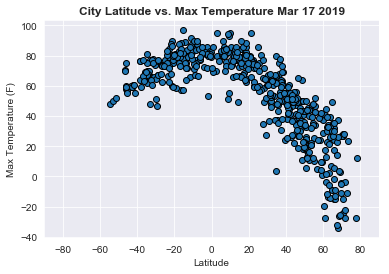

In [59]:
plt.scatter(df['Lat'], df['MaxTemp'], edgecolor="black")
plt.title(f'City Latitude vs. Max Temperature {formatted_time}', fontweight="bold")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
#change x axis to reflect all data from lists
plt.xlim(-90, 90)
#save figure
plt.savefig('Figures/temp_f_latitude.png')
#show figure
plt.show()

#### Latitude vs. Humidity Plot

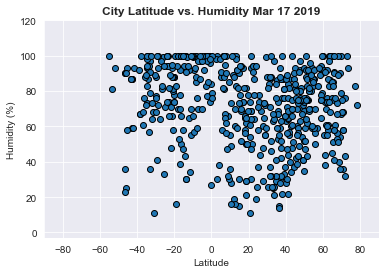

In [60]:
plt.scatter(df['Lat'], df['Humidity'], edgecolor="black")
plt.title(f'City Latitude vs. Humidity {formatted_time}', fontweight="bold")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
#change x axis to reflect all data from lists
plt.xlim(-90, 90)
plt.ylim(-3, 120)
#save figure
plt.savefig('Figures/humidity_latitude.png')
#show figure
plt.show()

#### Latitude vs. Cloudiness Plot

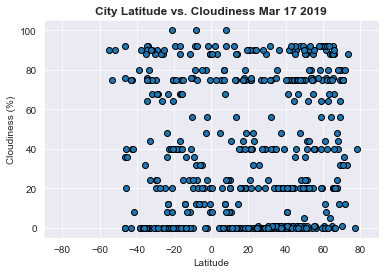

In [61]:
plt.scatter(df['Lat'], df['Cloudiness'], edgecolor="black")
plt.title(f'City Latitude vs. Cloudiness {formatted_time}', fontweight="bold")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
#change x axis to reflect all data from lists
plt.xlim(-90, 90)
#save figure
plt.savefig('Figures/cloudiness_latitude.png')
#show figure
plt.show()

#### Latitude vs. Wind Speed Plot

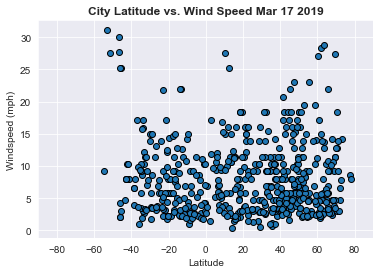

In [62]:
plt.scatter(df['Lat'], df['WindSpeed'], edgecolor="black")
plt.title(f'City Latitude vs. Wind Speed {formatted_time}', fontweight="bold")
plt.xlabel('Latitude')
plt.ylabel('Windspeed (mph)')
#change x axis to reflect all data from lists
plt.xlim(-90, 90)
#save figure
plt.savefig('Figures/windspeed_latitude.png')
#show figure
plt.show()